In [1]:
# !pip install geocoder
import tweepy
# !pip3 install twint
import json 
import datetime
import geocoder
from tweepy import OAuthHandler
# !pip install xlsxwriter   
import xlsxwriter
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
secrets = json.loads(open("secrets_Apple.json","r").read())

api_key = secrets['CONSUMER_KEY']
api_key_secret = secrets['CONSUMER_SECRET']
access_key = secrets['ACCESS_TOKEN_KEY']
access_key_secret = secrets['ACCESS_TOKEN_SECRET']

auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#change per brand
screen_name = "AppleSupport"

In [3]:
import csv
csvFile = open('apple_file1.csv', 'w')
counter=0

csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q='#AppleEDUchat',count=2000,lang="en", tweet_mode='extended').items(2000):
    print (tweet.full_text)
    csvWriter.writerow([tweet.full_text.encode('utf-8')])
counter+=1
print("Total %d User Timeline Tweets collected" % counter)
csvFile.close()

RT @licit_tech: Apple said it won’t let the Parler app back into its App Store https://t.co/5d8vkpadq2 #Apple #AppleDailyENG #APPLEMYBELOVE…
RT @licit_tech: Apple said it won’t let the Parler app back into its App Store https://t.co/5d8vkpadq2 #Apple #AppleDailyENG #APPLEMYBELOVE…
Apple said it won’t let the Parler app back into its App Store https://t.co/5d8vkpadq2 #Apple #AppleDailyENG #APPLEMYBELOVED #AppleMusic #AppleEDUchat #appleinternal #ApplePencil #Parler #parlerdown #CyberSecurity #CyberSec #cybersecuritynews #India #England #Nigeria #Kenya
I’m always so pleasantly surprised when free choice days are some of the most creative times for my MS students! #ipad #edtech @CoSpaces_Edu @scratch #AppleEDUchat https://t.co/dXxdUcYj3Q
Anyone else using Google Classroom (latest update 2.2021.06208) having difficulties on iPad? Seems to be anyone using this version on iPad 8th Generation are seeing a ‘black screen’ when it comes to marking pupil work #AppleEDUchat
This interview of Seth 

In [4]:
import pandas as pd
adf = pd.read_csv('Apple_file1.csv')  
adf.to_csv('sentiment_of_Apple.csv', header = ['Tweets'])

In [5]:
adf1 = pd.read_csv('sentiment_of_Apple.csv') 
adf1.shape

(1136, 2)

In [6]:
import re
import string

def clean_text(text):
  text = re.sub('@[\w]*','',text)
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation), '',text)
  text = re.sub('\w*\d\w*','',text)
  text= re.sub(r'@[A-Za-z0-9]+','',text) #remove mention
  text = re.sub('https?://[A-Za-z0-9./]+','',text) #remove https
  text = re.sub('b\w*','',text)
  return text

cleaned = lambda x: clean_text(x)

In [7]:
adf1['Tweets']= pd.DataFrame(adf1.Tweets.apply(cleaned))
adf1

Unnamed: 0                                             Tweets
0              0    Apple said it  let the Parler app  into its ...
1              1   said it  let the Parler app  into its App Sto...
2              2   always so pleasantly surprised when free choi...
3              3   else using Google Classroom latest update  ha...
4              4   interview of Seth Godin   is fantastic Seth s...
...          ...                                                ...
1131        1131    Trying to use keynote as much as I can and i...
1132        1132    Such an awesome pleasure to have  join us th...
1133        1133   is Marley from  sharing his acting project fo...
1134        1134   PLN AppleEduChat edutwitter mfltwitterati lan...
1135        1135    Just attended another amazing todayatapple s...

[1136 rows x 2 columns]

In [8]:
adf2=adf1.drop(["Unnamed: 0"], axis=1)
adf2

Tweets
0       Apple said it  let the Parler app  into its ...
1      said it  let the Parler app  into its App Sto...
2      always so pleasantly surprised when free choi...
3      else using Google Classroom latest update  ha...
4      interview of Seth Godin   is fantastic Seth s...
...                                                 ...
1131    Trying to use keynote as much as I can and i...
1132    Such an awesome pleasure to have  join us th...
1133   is Marley from  sharing his acting project fo...
1134   PLN AppleEduChat edutwitter mfltwitterati lan...
1135    Just attended another amazing todayatapple s...

[1136 rows x 1 columns]

In [9]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Lou Jia
[nltk_data]     Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to C:\Users\Lou Jia
[nltk_data]     Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lou Jia Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Lou Jia
[nltk_data]     Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

adf2['TBpolarity'] = adf2['Tweets'].apply(get_polarity)

In [12]:
adf3=adf2.drop_duplicates()
adf3.shape

(860, 2)

In [13]:
adf4=adf3.head(200)
adf4.shape

(200, 2)

In [14]:
adf4['Sentiment_type']= ''
adf4.loc[adf4.TBpolarity>0, 'Sentiment_type']='POSITIVE'
adf4.loc[adf4.TBpolarity==0, 'Sentiment_type']='NEUTRAL '
adf4.loc[adf4.TBpolarity<0, 'Sentiment_type']='NEGATIVE'
adf4.head()

C:\Users\Lou Jia Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lou Jia Yu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Lou Jia Yu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Tweets  TBpolarity  \
0    Apple said it  let the Parler app  into its ...    0.000000   
1   said it  let the Parler app  into its App Sto...    0.000000   
2   always so pleasantly surprised when free choi...    0.375000   
3   else using Google Classroom latest update  ha...    0.500000   
4   interview of Seth Godin   is fantastic Seth s...    0.433333   

  Sentiment_type  
0       NEUTRAL   
1       NEUTRAL   
2       POSITIVE  
3       POSITIVE  
4       POSITIVE

In [15]:
adf4['Sentiment_type'].value_counts()

POSITIVE    133
NEUTRAL      52
NEGATIVE     15
Name: Sentiment_type, dtype: int64

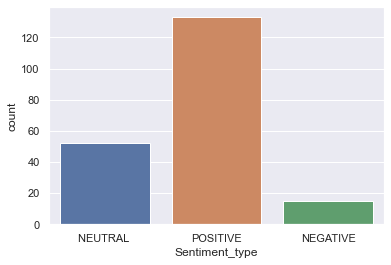

In [16]:
sns.countplot(x ='Sentiment_type',data = adf4)
plt.show()